In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('TinyData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Obs.        6 non-null      int64  
 1   Fat         6 non-null      float64
 2   Salt        6 non-null      float64
 3   Acceptance  6 non-null      object 
dtypes: float64(2), int64(1), object(1)
memory usage: 320.0+ bytes


In [3]:
df.head()

,Obs.,Fat,Salt,Acceptance
0,1,0.2,0.9,like
1,2,0.1,0.1,dislike
2,3,0.2,0.4,dislike
3,4,0.2,0.5,dislike
4,5,0.4,0.5,like


In [4]:
predictors = ['Fat', 'Salt']
outcome = 'Acceptance'

X = df[predictors]
y = df[outcome]
classes = sorted(y.unique())

In [5]:
clf = MLPClassifier(hidden_layer_sizes=(3), activation='logistic', solver='lbfgs', random_state=1,max_iter=200)
clf.fit(X, y)
clf.predict(X)

# Network structure
print('Intercepts')
print(clf.intercepts_)

print('Weights')
print(clf.coefs_)

# Prediction
print(pd.concat([df,pd.DataFrame(clf.predict_proba(X), columns=classes)], axis=1))

Intercepts
[array([0.13368045, 4.07247552, 7.00768104]), array([14.30748677])]
Weights
[array([[ -1.30656481,  -4.20427791, -13.29587332],
       [ -0.04399727,  -4.91606924,  -6.03356987]]), array([[ -0.27348313],
       [ -9.01211572],
       [-17.63504696]])]
   Obs.  Fat  Salt Acceptance   dislike      like
0     1  0.2   0.9       like  0.000490  0.999510
1     2  0.1   0.1    dislike  0.999994  0.000006
2     3  0.2   0.4    dislike  0.999741  0.000259
3     4  0.2   0.5    dislike  0.997368  0.002632
4     5  0.4   0.5       like  0.002133  0.997867
5     6  0.3   0.8       like  0.000075  0.999925


In [6]:
def evaluate_performance(actual,propensity,cutoff):
    
    cm = confusion_matrix(actual,[1 if p > cutoff else 0 for p in propensity]).ravel()
    
    tn=cm[0]
    fp=cm[1]
    fn=cm[2]
    tp=cm[3]
    n=tn+fp+fn+tp
    predictive_accuracy = (tn + tp)/n 
    
    #--------------True positive Rate / Sensitivity / Recall / Hit Rate-----------------
    #is the proportion of positive cases that were correctly identified
    #  TP / (TP + FN)
    true_positive_rate = tp / (tp + fn)
    sensitivity = true_positive_rate
    recall  = true_positive_rate
    hit_rate = true_positive_rate

    #-------------True Negative Rate / Specificity -----------------------
    # TN / (FP + TN)
    true_negative_rate = tn / (fp + tn)
    specificity = true_negative_rate
    
    #----------Precision or Positive Predictive Value---------------------
    #is the proportion of the predicted positive cases that were correct 
    # TP / (TP + FP)
    precision= tp / (tp + fp)
    positive_predictive_value=precision

    #---------------False Positive Rate or Fall Out---------------------------    
    #false positive rate (FP) is the proportion of negatives cases that were 
    #incorrectly classified as positive
    # FPR = FP / (FP + TN)
    # FPR = 1 - specificity
    #FPR = 1 - True Negative Rate
    false_positive_rate=fp / (fp+tn)
    fall_out=false_positive_rate

    #---------------False Negative Rate or Miss Rate --------------------------
    #is the proportion of positives cases that were incorrectly classified as negative
    # a=TP True Positives
    # b=FP False Positive
    # c=FN False Negatives
    # d=TN True Negative  
    #FN / (FN + TP)
    false_negative_rate=fn/(fn+tp)
    miss_rate=false_negative_rate

    #-----------negative Predictive value------------------    
    # TN / (TN + FN)
    negative_predictive_value=tn/(tn+fn)
    
    #-----------false discovery rate ---------------------
    # FP / (TP + FP)
    # 1 - precision
    false_discovery_rate=fp/(tp+fp)

    #----------------informedness------------------------
    #sensitivity + specificity - 1
    # true positive rate + true negative rate - 1
    informedness=sensitivity + specificity - 1

    #------------------markedness----------------------------
    #precision + negative predictive value
    #positive predictive value + negative predictive value
    markedness=precision + negative_predictive_value
    
    #klearn.metrics.accuracy_score
    accuracy_scor=accuracy_score(actual,[1 if p > cutoff else 0 for p in propensity])
    
    #average_precision_score
    average_precision_scor=average_precision_score(actual,[1 if p > cutoff else 0 for p in propensity])
        
    f1_scor=f1_score(actual,[1 if p > cutoff else 0 for p in propensity])
    
    log_loss_=log_loss(actual,[1 if p > cutoff else 0 for p in propensity])
    
    roc_auc_scor=roc_auc_score(actual,[1 if p > cutoff else 0 for p in propensity])
    
    return "true negative "+ str(tn), \
           "false positive "+str(fp),\
           "false negative "+str(fn),\
           "true positive "+str(tp),\
           "predictive accuracy "+ str(predictive_accuracy),\
           "true positive rate "+str(true_positive_rate),\
           "sensitivity "+str(sensitivity),\
           "recall "+str(recall),\
           "hit rate "+str(hit_rate),\
           "true negative rate "+str(true_negative_rate),\
           "specificity "+str(specificity),\
           "precision "+str(precision),\
           "positive predictive value " + str(positive_predictive_value),\
           "false_positive_rate "+str(false_positive_rate),\
           "fall_out "+str(fall_out),\
           "false_negative_rate "+str(false_negative_rate),\
           "miss_rate "+str(miss_rate),\
           "negative_predictive_value "+str(negative_predictive_value), \
           "false_discovery_rate "+str(false_discovery_rate), \
           "informedness "+str(informedness),\
           "markedness "+str(markedness),\
           "accuracy score "+str(accuracy_scor),\
           "average_precision_score "+str(average_precision_scor),\
           "f1_score "+str(f1_scor),\
           "log_loss "+str(log_loss_),\
           "roc auc score "+str(roc_auc_scor)



In [7]:
evaluate_performance(actual=[1 if p =='like' else 0 for p in y],
                     propensity=pd.DataFrame(clf.predict_proba(X), columns=classes).iloc[:,1],
                     cutoff=0.5)

('true negative 3',
 'false positive 0',
 'false negative 0',
 'true positive 3',
 'predictive accuracy 1.0',
 'true positive rate 1.0',
 'sensitivity 1.0',
 'recall 1.0',
 'hit rate 1.0',
 'true negative rate 1.0',
 'specificity 1.0',
 'precision 1.0',
 'positive predictive value 1.0',
 'false_positive_rate 0.0',
 'fall_out 0.0',
 'false_negative_rate 0.0',
 'miss_rate 0.0',
 'negative_predictive_value 1.0',
 'false_discovery_rate 0.0',
 'informedness 1.0',
 'markedness 2.0',
 'accuracy score 1.0',
 'average_precision_score 1.0',
 'f1_score 1.0',
 'log_loss 9.992007221626415e-16',
 'roc auc score 1.0')

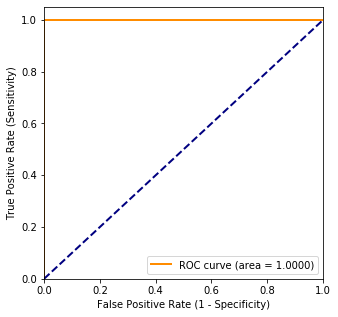

In [8]:
actual=[1 if p =='like' else 0 for p in y]
propensity=pd.DataFrame(clf.predict_proba(X), columns=classes).iloc[:,1]

fpr, tpr, _ = roc_curve(actual,propensity)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[5, 5])
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

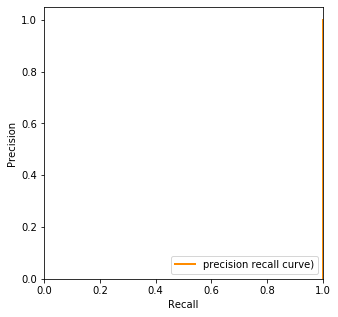

In [9]:
precision, recall, _ = precision_recall_curve(actual, propensity)

plt.figure(figsize=[5, 5])
lw = 2
plt.plot(precision, recall, color='darkorange',
         lw=lw, label='precision recall curve)')
#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower right")

plt.show()

+ ALCOHOL_I		Alcohol involved = 1, not involved = 2
+ PROFIL_I_R		1= level, 0=other
+ SUR_CON		Surface conditions (1=dry, 2=wet, 3=snow/slush, 4=ice, 5=sand/dirt/oil, 8=other, 9=unknown)
+ VEH_INVL		Number of vehicles involved
+ MAX_SEV_IR		0=no injury, 1=non-fatal inj., 2=fatal inj.

In [10]:
df = pd.read_csv('accidentsnn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ALCHL_I     999 non-null    int64
 1   PROFIL_I_R  999 non-null    int64
 2   SUR_COND    999 non-null    int64
 3   VEH_INVL    999 non-null    int64
 4   MAX_SEV_IR  999 non-null    int64
dtypes: int64(5)
memory usage: 39.1 KB


In [11]:
for x in df.columns:
    print(df.groupby([x]).size())

ALCHL_I
1    123
2    876
dtype: int64
PROFIL_I_R
0    771
1    228
dtype: int64
SUR_COND
1    782
2    177
3      8
4     28
9      4
dtype: int64
VEH_INVL
1    746
2    220
3     21
4     10
5      2
dtype: int64
MAX_SEV_IR
0    551
1    299
2    149
dtype: int64


In [12]:
df['ALCHL_I']=np.where(df['ALCHL_I']==2,0,df['ALCHL_I'])
df.groupby(['ALCHL_I']).size()

ALCHL_I
0    876
1    123
dtype: int64

In [13]:
df=pd.get_dummies(df, columns=['SUR_COND']).drop('SUR_COND_9',axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ALCHL_I     999 non-null    int64
 1   PROFIL_I_R  999 non-null    int64
 2   VEH_INVL    999 non-null    int64
 3   MAX_SEV_IR  999 non-null    int64
 4   SUR_COND_1  999 non-null    uint8
 5   SUR_COND_2  999 non-null    uint8
 6   SUR_COND_3  999 non-null    uint8
 7   SUR_COND_4  999 non-null    uint8
dtypes: int64(4), uint8(4)
memory usage: 35.2 KB


In [15]:
df['VEH_INVL_imp']=( df['VEH_INVL'] - df['VEH_INVL'].min() ) / ( df['VEH_INVL'].max() - df['VEH_INVL'].min())
df.groupby(['VEH_INVL','VEH_INVL_imp']).size()

VEH_INVL  VEH_INVL_imp
1         0.00            746
2         0.25            220
3         0.50             21
4         0.75             10
5         1.00              2
dtype: int64

In [16]:
#predict deaths

df['outcome']=np.where(df['MAX_SEV_IR']>1,1,0)
df=df.drop('MAX_SEV_IR',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ALCHL_I       999 non-null    int64  
 1   PROFIL_I_R    999 non-null    int64  
 2   VEH_INVL      999 non-null    int64  
 3   SUR_COND_1    999 non-null    uint8  
 4   SUR_COND_2    999 non-null    uint8  
 5   SUR_COND_3    999 non-null    uint8  
 6   SUR_COND_4    999 non-null    uint8  
 7   VEH_INVL_imp  999 non-null    float64
 8   outcome       999 non-null    int32  
dtypes: float64(1), int32(1), int64(3), uint8(4)
memory usage: 39.1 KB


In [17]:
df.groupby(['outcome']).size()

outcome
0    850
1    149
dtype: int64

In [18]:
df.describe()

,ALCHL_I,PROFIL_I_R,VEH_INVL,SUR_COND_1,SUR_COND_2,SUR_COND_3,SUR_COND_4,VEH_INVL_imp,outcome
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.123123,0.228228,1.300300,0.782783,0.177177,0.008008,0.028028,0.075075,0.149149
std,0.328743,0.419901,0.580158,0.412558,0.382010,0.089173,0.165136,0.145039,0.356414
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.250000,0.000000
max,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df.corr()

,ALCHL_I,PROFIL_I_R,VEH_INVL,SUR_COND_1,SUR_COND_2,SUR_COND_3,SUR_COND_4,VEH_INVL_imp,outcome
ALCHL_I,1.000000,0.043030,-0.031191,0.086571,-0.078135,-0.033667,-0.045174,-0.031191,0.270705
PROFIL_I_R,0.043030,1.000000,0.298335,-0.066370,0.059991,0.004661,0.023260,0.298335,0.200818
VEH_INVL,-0.031191,0.298335,1.000000,-0.317473,0.311267,0.069679,0.048023,1.000000,0.132075
SUR_COND_1,0.086571,-0.066370,-0.317473,1.000000,-0.880895,-0.170562,-0.322361,-0.317473,0.029747
SUR_COND_2,-0.078135,0.059991,0.311267,-0.880895,1.000000,-0.041693,-0.078799,0.311267,-0.039736
SUR_COND_3,-0.033667,0.004661,0.069679,-0.170562,-0.041693,1.000000,-0.015257,0.069679,-0.006091
SUR_COND_4,-0.045174,0.023260,0.048023,-0.322361,-0.078799,-0.015257,1.000000,0.048023,-0.020024
VEH_INVL_imp,-0.031191,0.298335,1.000000,-0.317473,0.311267,0.069679,0.048023,1.000000,0.132075
outcome,0.270705,0.200818,0.132075,0.029747,-0.039736,-0.006091,-0.020024,0.132075,1.000000


In [20]:
predictors=['ALCHL_I', 'PROFIL_I_R', 'SUR_COND_1', 'SUR_COND_2',
       'SUR_COND_3', 'SUR_COND_4', 'VEH_INVL_imp',]
target=['outcome']

# partition data
X = df[predictors]
y = df[target]

In [21]:
X.head()

,ALCHL_I,PROFIL_I_R,SUR_COND_1,SUR_COND_2,SUR_COND_3,SUR_COND_4,VEH_INVL_imp
0,0,0,1,0,0,0,0.00
1,0,1,1,0,0,0,0.00
2,1,0,1,0,0,0,0.00
3,0,0,0,1,0,0,0.25
4,0,1,1,0,0,0,0.25


In [22]:
y

,outcome
0,0
1,1
2,0
3,0
4,0
...,...
994,0
995,0
996,0
997,1


In [23]:

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# train neural network with 2 hidden nodes
clf = MLPClassifier(hidden_layer_sizes=(1), activation='logistic', solver='lbfgs',
                    random_state=1,max_iter=200)
clf.fit(train_X, train_y.values)



C:\Users\rtreichl\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=1, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [24]:
actual=valid_y
propensity=pd.DataFrame(clf.predict_proba(valid_X)).iloc[:,1]

evaluate_performance(actual=actual,
                     propensity=propensity,
                     cutoff=0.5)

C:\Users\rtreichl\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\rtreichl\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in longlong_scalars


('true negative 338',
 'false positive 0',
 'false negative 62',
 'true positive 0',
 'predictive accuracy 0.845',
 'true positive rate 0.0',
 'sensitivity 0.0',
 'recall 0.0',
 'hit rate 0.0',
 'true negative rate 1.0',
 'specificity 1.0',
 'precision nan',
 'positive predictive value nan',
 'false_positive_rate 0.0',
 'fall_out 0.0',
 'false_negative_rate 1.0',
 'miss_rate 1.0',
 'negative_predictive_value 0.845',
 'false_discovery_rate nan',
 'informedness 0.0',
 'markedness nan',
 'accuracy score 0.845',
 'average_precision_score 0.155',
 'f1_score 0.0',
 'log_loss 5.353510341211156',
 'roc auc score 0.5')

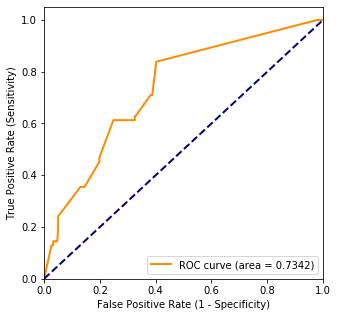

In [25]:

fpr, tpr, _ = roc_curve(actual,propensity)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[5, 5])
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

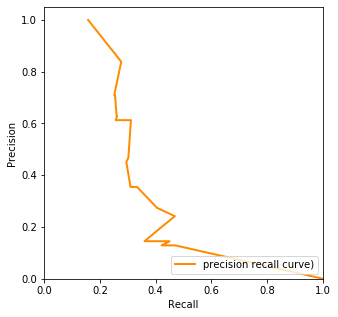

In [26]:
precision, recall, _ = precision_recall_curve(actual, propensity)

plt.figure(figsize=[5, 5])
lw = 2
plt.plot(precision, recall, color='darkorange',
         lw=lw, label='precision recall curve)')
#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower right")

plt.show()

In [27]:
hidden_layer=[]
for l in range(1,6):
    for n in range(1,10):
        hidden_layer.append((l,n))
hidden_layer

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9)]

In [28]:
param_grid = {
    'hidden_layer_sizes': hidden_layer,
    'activation':  ['identity', 'logistic', 'tanh', 'relu'],
    }

gridSearch = GridSearchCV(MLPClassifier(#activation='logistic',
    solver='lbfgs', 
    random_state=1,max_iter=1000),param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

C:\Users\rtreichl\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Initial score:  0.8664145658263305
Initial parameters:  {'activation': 'relu', 'hidden_layer_sizes': (4, 8)}


In [29]:
display=['param_hidden_layer_sizes', 'mean_test_score', 'std_test_score']
print(pd.DataFrame(gridSearch.cv_results_)[display])

    param_hidden_layer_sizes  mean_test_score  std_test_score
0                     (1, 1)         0.858081        0.009370
1                     (1, 2)         0.863081        0.010343
2                     (1, 3)         0.858081        0.009370
3                     (1, 4)         0.854748        0.004409
4                     (1, 5)         0.858081        0.009370
..                       ...              ...             ...
175                   (5, 5)         0.856401        0.013640
176                   (5, 6)         0.849720        0.014286
177                   (5, 7)         0.856443        0.016870
178                   (5, 8)         0.858067        0.014269
179                   (5, 9)         0.853081        0.008611

[180 rows x 3 columns]


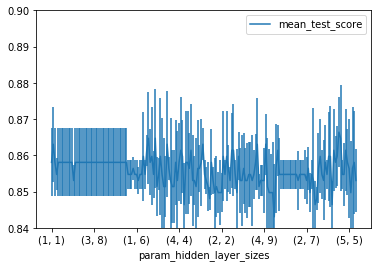

In [30]:
pd.DataFrame(gridSearch.cv_results_)[display].plot(x='param_hidden_layer_sizes', 
                                                   y='mean_test_score', yerr='std_test_score', ylim=(0.84, 0.90))

In [31]:
# train neural network with 2 hidden nodes
clf = MLPClassifier(hidden_layer_sizes=(4,8), activation='relu', solver='lbfgs',
                    random_state=1,max_iter=300)
clf.fit(train_X, train_y.values)


C:\Users\rtreichl\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [32]:
actual=valid_y
propensity=pd.DataFrame(clf.predict_proba(valid_X)).iloc[:,1]

evaluate_performance(actual=actual,
                     propensity=propensity,
                     cutoff=0.5)

('true negative 334',
 'false positive 4',
 'false negative 50',
 'true positive 12',
 'predictive accuracy 0.865',
 'true positive rate 0.1935483870967742',
 'sensitivity 0.1935483870967742',
 'recall 0.1935483870967742',
 'hit rate 0.1935483870967742',
 'true negative rate 0.9881656804733728',
 'specificity 0.9881656804733728',
 'precision 0.75',
 'positive predictive value 0.75',
 'false_positive_rate 0.011834319526627219',
 'fall_out 0.011834319526627219',
 'false_negative_rate 0.8064516129032258',
 'miss_rate 0.8064516129032258',
 'negative_predictive_value 0.8697916666666666',
 'false_discovery_rate 0.25',
 'informedness 0.18171406757014696',
 'markedness 1.6197916666666665',
 'accuracy score 0.865',
 'average_precision_score 0.2701612903225806',
 'f1_score 0.30769230769230765',
 'log_loss 4.662742809287245',
 'roc auc score 0.5908570337850736')

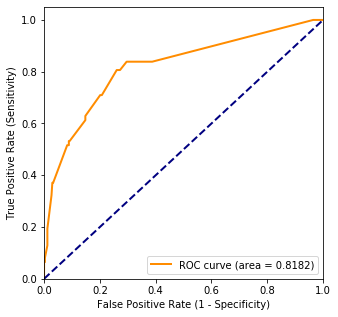

In [33]:
fpr, tpr, _ = roc_curve(actual,propensity)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[5, 5])
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

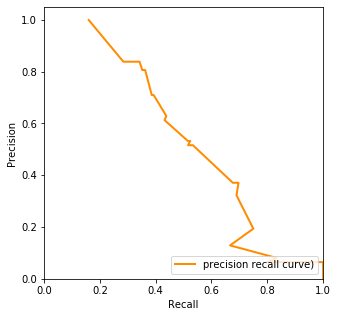

In [34]:
precision, recall, _ = precision_recall_curve(actual, propensity)

plt.figure(figsize=[5, 5])
lw = 2
plt.plot(precision, recall, color='darkorange',
         lw=lw, label='precision recall curve)')
#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower right")

plt.show()

+    ID   		 	 Customer ID
+    Age   		 Customer's age in completed years
+    Experience   	 #years of professional experience
+    Income   		 Annual income of the customer ($000)
+    ZIPCode   		 Home Address ZIP code.
+    Family   		 Family size of the customer
+    CCAvg   		 Avg. spending on credit cards per month (000)
+    Education   	 	 Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
+    Mortgage   	 	 Value of house mortgage if any. (000)
+    Personal Loan   	 Did this customer accept the personal loan offered in the last campaign?
+    Securities Account   Does the customer have a securities account with the bank?
+    CD Account   	 Does the customer have a certificate of deposit (CD) account with the bank?
+    Online   		 Does the customer use internet banking facilities?
+    CreditCard   	 Does the customer use a credit card issued by UniversalBank?


In [35]:
df = pd.read_csv('UniversalBank.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [36]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [37]:
df=df.drop(columns=['ID', 'ZIP Code'],axis=1)

In [38]:
# split into training and validation
X = df.drop(columns=['Personal Loan'])
y = df['Personal Loan']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.40, random_state=3)

In [39]:
def eval_tp(actual,propensity,cutoff):
    
    cm = confusion_matrix(actual,[1 if p > cutoff else 0 for p in propensity]).ravel()
    
    tn=cm[0]
    fp=cm[1]
    fn=cm[2]
    tp=cm[3]
    true_positive_rate = tp / (tp + fn)
    sensitivity = true_positive_rate
    recall  = true_positive_rate
    hit_rate = true_positive_rate
    precision= tp / (tp + fp)
    positive_predictive_value=precision

    roc_auc_scor=roc_auc_score(actual,[1 if p > cutoff else 0 for p in propensity])
    
    return "true negative "+ str(tn), \
           "false positive "+str(fp),\
           "false negative "+str(fn),\
           "true positive "+str(tp),\
           "true positive rate "+str(true_positive_rate),\
           "sensitivity "+str(sensitivity),\
           "recall "+str(recall),\
           "hit rate "+str(hit_rate),\
           "precision "+str(precision),\
           "positive predictive value " + str(positive_predictive_value)


# Decision Tree

In [40]:

clf = DecisionTreeClassifier(random_state=1)

param_grid = {
    'max_depth': [6],           #list(np.arange(4,8)),    
    'min_samples_split': [2],   #list(np.arange(1,4)), 
    'min_samples_leaf':  [5],   #list(np.arange(4,7)) ,#
#    'min_impurity_decrease': list(np.arange(0.0,0.015,0.001)), #
    'max_features': [10], #[7,8,9,10,11,12],    #
    'random_state': [1]
}
gridSearch = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_
print(clf)                  
eval_tp(actual=valid_y,
        propensity=pd.DataFrame(clf.predict_proba(valid_X)).iloc[:,1],
        cutoff=0.5)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')


('true negative 1772',
 'false positive 21',
 'false negative 16',
 'true positive 191',
 'true positive rate 0.9227053140096618',
 'sensitivity 0.9227053140096618',
 'recall 0.9227053140096618',
 'hit rate 0.9227053140096618',
 'precision 0.9009433962264151',
 'positive predictive value 0.9009433962264151')

# Random Forest

In [41]:
clf = RandomForestClassifier(random_state=1)


param_grid = {
    'max_depth': [8],#list(np.arange(7,9)),
    'min_samples_split': [3],#list(np.arange(1,4)),
    'min_samples_leaf': [1],#list(np.arange(1,3)),
    'max_samples': [0.7],#list(np.arange(0.6,0.85,0.1)),
    'n_estimators': list(np.arange(100,1100,100)),   
#    'criterion': ['gini','entropy'],  
    'max_features':[8], 
    'random_state':[1],   
    
}
gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1,)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)

eval_tp(actual=valid_y,
        propensity=pd.DataFrame(clf.predict_proba(valid_X)).iloc[:,1],
        cutoff=0.5)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=8,
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


('true negative 1778',
 'false positive 15',
 'false negative 21',
 'true positive 186',
 'true positive rate 0.8985507246376812',
 'sensitivity 0.8985507246376812',
 'recall 0.8985507246376812',
 'hit rate 0.8985507246376812',
 'precision 0.9253731343283582',
 'positive predictive value 0.9253731343283582')

# Gradient Boosting

In [42]:
clf = GradientBoostingClassifier()

param_grid = {
    'min_samples_split': [9],#list(np.arange(3,11)), 
    'min_samples_leaf':[1],# list(np.arange(1,2)), 
    'max_depth': [6],#list(np.arange(4,8)), 
    'subsample':[0.75],# list(np.arange(0.5,0.8,0.25)), 
    'max_features':[10],#[9,10,11] , 
    'learning_rate': [0.13],#list(np.arange(0.08,0.22,0.02)), 
    'n_estimators': [200] , 
    'random_state': [1], 
}

gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)

eval_tp(actual=valid_y,
        propensity=pd.DataFrame(clf.predict_proba(valid_X)).iloc[:,1],
        cutoff=0.5)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.13, loss='deviance', max_depth=6,
                           max_features=10, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=9,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.75, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


('true negative 1782',
 'false positive 11',
 'false negative 19',
 'true positive 188',
 'true positive rate 0.9082125603864735',
 'sensitivity 0.9082125603864735',
 'recall 0.9082125603864735',
 'hit rate 0.9082125603864735',
 'precision 0.9447236180904522',
 'positive predictive value 0.9447236180904522')

# bagging decision tree

In [43]:
clf = BaggingClassifier(DecisionTreeClassifier(max_depth=6,min_samples_split=2,
                                               min_samples_leaf=5,max_features=10,random_state=1),
                        n_estimators=100, random_state=1)

param_grid = {}
gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)

eval_tp(actual=valid_y,
        propensity=pd.DataFrame(clf.predict_proba(valid_X)).iloc[:,1],
        cutoff=0.5)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=6,
                                                        max_features=10,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=5,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=1,
        

('true negative 1780',
 'false positive 13',
 'false negative 30',
 'true positive 177',
 'true positive rate 0.855072463768116',
 'sensitivity 0.855072463768116',
 'recall 0.855072463768116',
 'hit rate 0.855072463768116',
 'precision 0.9315789473684211',
 'positive predictive value 0.9315789473684211')

# bagging random forest

In [44]:
clf = BaggingClassifier(RandomForestClassifier(max_depth=8,min_samples_split=3,
                                               min_samples_leaf=1,max_samples=0.7,
                                               max_features=8,random_state=1), n_estimators=100, random_state=1)

param_grid = {}
gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)

eval_tp(actual=valid_y,
        propensity=pd.DataFrame(clf.predict_proba(valid_X)).iloc[:,1],
        cutoff=0.5)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=8,
                                                        max_features=8,
                                                        max_leaf_nodes=None,
                                                        max_samples=0.7,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=3,
                                                        min_weight_fraction_leaf=0.0,
              

('true negative 1780',
 'false positive 13',
 'false negative 26',
 'true positive 181',
 'true positive rate 0.8743961352657005',
 'sensitivity 0.8743961352657005',
 'recall 0.8743961352657005',
 'hit rate 0.8743961352657005',
 'precision 0.9329896907216495',
 'positive predictive value 0.9329896907216495')

# bagging gradient boosting

In [45]:
clf = BaggingClassifier(GradientBoostingClassifier(min_samples_split=9,min_samples_leaf=1,
                                                   max_depth=6,subsample=0.75,max_features=10,
                                                   learning_rate=0.13,random_state=1,n_estimators=2000), random_state=1)

param_grid = {}
gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)

eval_tp(actual=valid_y,
        propensity=pd.DataFrame(clf.predict_proba(valid_X)).iloc[:,1],
        cutoff=0.5)

BaggingClassifier(base_estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                            criterion='friedman_mse',
                                                            init=None,
                                                            learning_rate=0.13,
                                                            loss='deviance',
                                                            max_depth=6,
                                                            max_features=10,
                                                            max_leaf_nodes=None,
                                                            min_impurity_decrease=0.0,
                                                            min_impurity_split=None,
                                                            min_samples_leaf=1,
                                                            min_samples_split=9,
                                               

('true negative 1780',
 'false positive 13',
 'false negative 19',
 'true positive 188',
 'true positive rate 0.9082125603864735',
 'sensitivity 0.9082125603864735',
 'recall 0.9082125603864735',
 'hit rate 0.9082125603864735',
 'precision 0.9353233830845771',
 'positive predictive value 0.9353233830845771')

# adaboost decision tree

In [46]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6,min_samples_split=2,
                                               min_samples_leaf=5,max_features=10,random_state=1), 
                         n_estimators=100, random_state=1)

param_grid = {}
gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)
                        
eval_tp(actual=valid_y,
        propensity=pd.DataFrame(clf.predict_proba(valid_X)).iloc[:,1],
        cutoff=0.5)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=6,
                                                         max_features=10,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

('true negative 1789',
 'false positive 4',
 'false negative 22',
 'true positive 185',
 'true positive rate 0.893719806763285',
 'sensitivity 0.893719806763285',
 'recall 0.893719806763285',
 'hit rate 0.893719806763285',
 'precision 0.9788359788359788',
 'positive predictive value 0.9788359788359788')

# adaboost random forest

In [47]:
clf = AdaBoostClassifier(RandomForestClassifier(max_depth=8,min_samples_split=3,
                                                min_samples_leaf=1,max_samples=0.7,
                                                max_features=8,random_state=1), n_estimators=100, random_state=1)

param_grid = {}
gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)
                        
eval_tp(actual=valid_y,
        propensity=pd.DataFrame(clf.predict_proba(valid_X)).iloc[:,1],
        cutoff=0.5)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=8,
                                                         max_features=8,
                                                         max_leaf_nodes=None,
                                                         max_samples=0.7,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=3,
                                                

('true negative 1789',
 'false positive 4',
 'false negative 26',
 'true positive 181',
 'true positive rate 0.8743961352657005',
 'sensitivity 0.8743961352657005',
 'recall 0.8743961352657005',
 'hit rate 0.8743961352657005',
 'precision 0.9783783783783784',
 'positive predictive value 0.9783783783783784')

# adaboost gradient boosting

In [48]:
clf = AdaBoostClassifier(GradientBoostingClassifier(min_samples_split=9,min_samples_leaf=1,
                                                    max_depth=6,subsample=0.75,max_features=10,
                                                    learning_rate=0.13,random_state=1), 
                         n_estimators=2000, random_state=1)

param_grid = {}
gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)
                        
eval_tp(actual=valid_y,
        propensity=pd.DataFrame(clf.predict_proba(valid_X)).iloc[:,1],
        cutoff=0.5)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                             criterion='friedman_mse',
                                                             init=None,
                                                             learning_rate=0.13,
                                                             loss='deviance',
                                                             max_depth=6,
                                                             max_features=10,
                                                             max_leaf_nodes=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_spli

('true negative 1782',
 'false positive 11',
 'false negative 16',
 'true positive 191',
 'true positive rate 0.9227053140096618',
 'sensitivity 0.9227053140096618',
 'recall 0.9227053140096618',
 'hit rate 0.9227053140096618',
 'precision 0.9455445544554455',
 'positive predictive value 0.9455445544554455')

# Voting Ensemble - hard

In [49]:
dt = DecisionTreeClassifier(max_depth=6,min_samples_split=2,min_samples_leaf=5,max_features=10,random_state=1)

rf = RandomForestClassifier(max_depth=8,min_samples_split=3,
                            min_samples_leaf=1,max_samples=0.7,max_features=8,random_state=1,)

gb = GradientBoostingClassifier(min_samples_split=9,n_estimators=2000,
                                min_samples_leaf=1,max_depth=6,subsample=0.75,
                                max_features=10,learning_rate=0.13,random_state=1)

ada_gb=AdaBoostClassifier(GradientBoostingClassifier(min_samples_split=9,min_samples_leaf=1,
                                                    max_depth=6,subsample=0.75,max_features=10,
                                                    learning_rate=0.13,random_state=1), 
                         n_estimators=2000, random_state=1)

logit = LogisticRegression(penalty="l2", C=1e12, solver='lbfgs',n_jobs=-1)

clf = VotingClassifier([('dt',dt),
                        ('rf',rf),
                        ('gb',gb),
#                        ('logit',logit)
                        ('ada_gb',ada_gb)],
                       voting='hard',  n_jobs=-1)
clf.fit(train_X, train_y)

print(clf)

cm = confusion_matrix(valid_y,clf.predict(valid_X)).ravel()
print(cm)

tn=cm[0]
fp=cm[1]
fn=cm[2]
tp=cm[3]
true_positive_rate = tp / (tp + fn)
true_positive_rate 

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=6,
                                                     max_features=10,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=5,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=1,
           

0.9178743961352657

# Voting Ensemble - soft

In [50]:
dt = DecisionTreeClassifier(max_depth=6,min_samples_split=2,min_samples_leaf=5,max_features=10,random_state=1)

rf = RandomForestClassifier(max_depth=8,min_samples_split=3,
                            min_samples_leaf=1,max_samples=0.7,max_features=8,random_state=1,)

gb = GradientBoostingClassifier(min_samples_split=9,
                                min_samples_leaf=1,max_depth=6,subsample=0.75,
                                max_features=10,learning_rate=0.13,random_state=1)

ada_gb=AdaBoostClassifier(GradientBoostingClassifier(min_samples_split=9,min_samples_leaf=1,
                                                    max_depth=6,subsample=0.75,max_features=10,
                                                    learning_rate=0.13,random_state=1), 
                         n_estimators=100, random_state=1)

logit = LogisticRegression(penalty="l2", C=1e12, solver='lbfgs',n_jobs=-1)

clf = VotingClassifier([('dt',dt),
                        ('rf',rf),
                        ('gb',gb),
#                        ('logit',logit)
                        ('ada_gb',ada_gb)],
                       voting='soft',  n_jobs=-1)
clf.fit(train_X, train_y)

print(clf)

cm = confusion_matrix(valid_y,clf.predict(valid_X)).ravel()
print(cm)

tn=cm[0]
fp=cm[1]
fn=cm[2]
tp=cm[3]
true_positive_rate = tp / (tp + fn)
true_positive_rate 

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=6,
                                                     max_features=10,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=5,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=1,
           

0.9178743961352657